In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#from InterNetwork import set_seed, Leg_Setup, NN_run, NN_results, Get_Num_Legs
from InterNetwork import *
from datetime import datetime
import numpy as np

from matplotlib import rc
rc("font", family="serif", size=14)
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1, l2
import pickle
from shutil import copyfile

import smtplib, ssl
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage


from neuralStellar2 import stellarGrid,NNmodel
#tf.compat.v1.enable_eager_execution()

config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.Session(config=config)
config.gpu_options.allow_growth = True

"""
preventing disconnect
1. ctrl+shift+i
2. go to console
3. go to the bottom and paste:
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

4. hit enter
"""

Using TensorFlow backend.


'\npreventing disconnect\n1. ctrl+shift+i\n2. go to console\n3. go to the bottom and paste:\nfunction ClickConnect(){\nconsole.log("Working"); \ndocument.querySelector("colab-toolbar-button#connect").click() \n}\nsetInterval(ClickConnect,60000)\n\n4. hit enter\n'

In [0]:
folder_name = 'test'
load_partially_trained_model = False
recompile = False #recompile rules: 1. if not list: it will always set whether to recompile to that value, 2. if list: each leg will recompile based on the corresponding recompile list elemnt, 3. if list is shorter than no. legs: for legs with indeces greater than the list, those legs will be set to not recompile unless otherwise instructed, 4. if recompile gives a leg False to but other parameter changes require it to recompile it will still recompile.
load_RGB_only = True
poly_degree = 0 #the degree of the polynomial used to fit the RGB to scale the radius. If None or 0: skips radius scaling

#hidden_layers = ['bn']+[156]*8+[256]*2
hidden_layers = [80]*5
activation = 'elu'
mean_error_type = 'MAE'

dropout = None

decay = None
momentum = 0 #between 0 and 1, setting momentum as 0 right now doesn't effect NAdam

#opt = 'Nadam'
opt = ['Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam','Nadam']
#reg = None
reg = [['l2',1E-5]]
#reg = [['l2',1E-5],['l2',1E-5],['l2',1E-5],['l2',1E-6],['l2',1E-6],['l2',1E-6],None,None,None,None]

epoch_no = [400,400,400,600,10000,6000,6000,6000,10000] #experimental epochs
#lr = [0.0001,0.0002,0.0005,0.001] #standard pipeline, you can now pass lr 'prev' so that it recompiles using the _decayed_lr from the previous leg
lr = [0.0001,0.0002,0.0005,0.001,'prev']
batch_size = [1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000] #standard pipeline
#batch_size = [int(len(df.index)/480),int(len(df.index)/240),int(len(df.index)/120),int(len(df.index)/60),int(len(df.index)/30),int(len(df.index)/20),int(len(df.index)/10),int(len(df.index)/5),int(len(df.index))]
#+[int(len(df.index)/120),int(len(df.index))]
#full batch = 909444 points

leg: 1/9
epochs of leg: 400, optimizer: Nadam, activation: elu
learning rate: 0.0001, batch size: 1000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
Model: "neuralstellar"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense_30 (Dense)             (None, 80)                480       
_________________________________________________________________
dense_31 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_32 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_33 (Dense)             (None, 80)                6480      
_________________________________________________________________
dense_34 (Dens

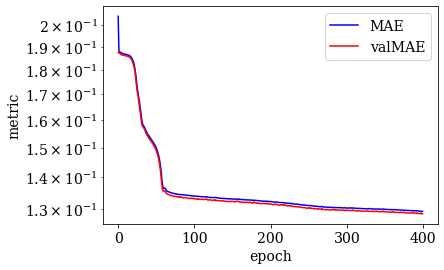

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


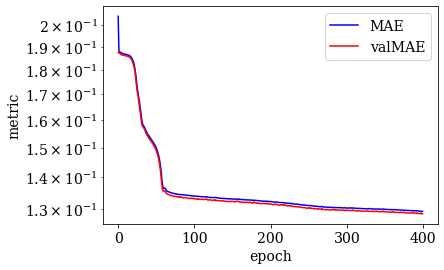

found 8745 stars.
60000/60000 - 0s


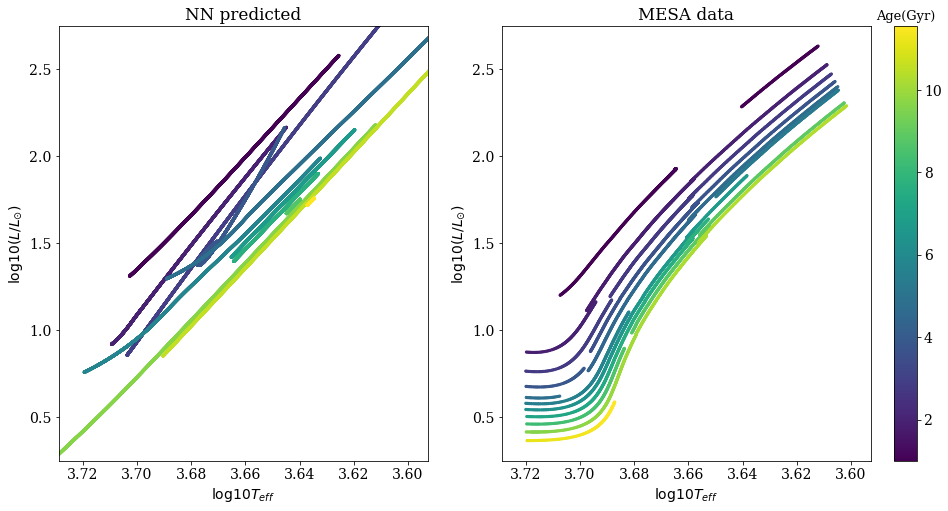

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.12914348
leg: 2/9
epochs of leg: 400, optimizer: Nadam, activation: elu
learning rate: 0.0002, batch size: 2000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 15:29:37.780917 | Time elapsed=0:15:06.884287


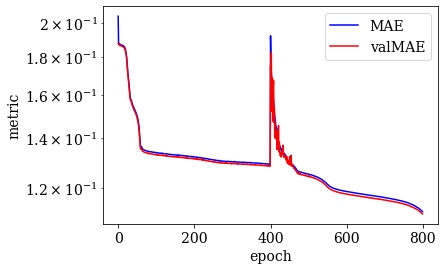

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


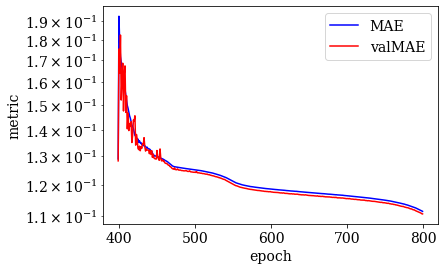

found 8745 stars.
60000/60000 - 0s


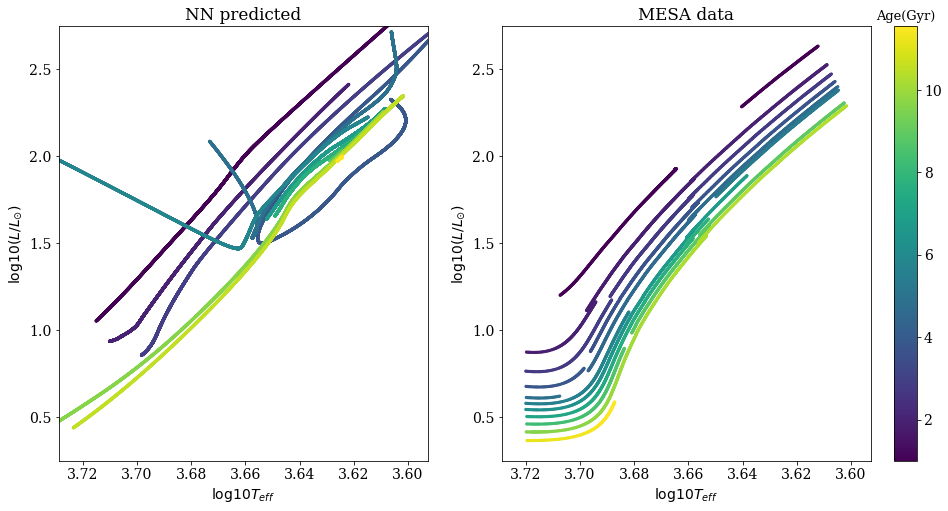

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.11153298
leg: 3/9
epochs of leg: 400, optimizer: Nadam, activation: elu
learning rate: 0.0005, batch size: 5000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 15:37:34.981724 | Time elapsed=0:07:29.329255


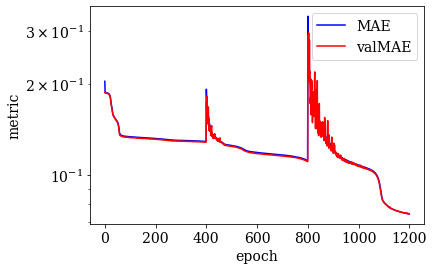

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


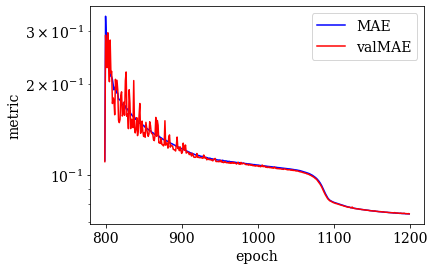

found 8745 stars.
60000/60000 - 0s


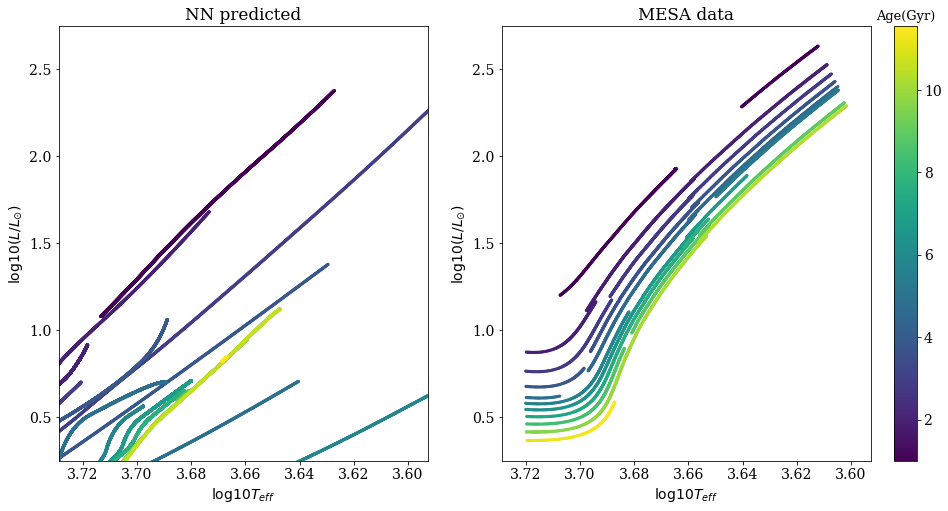

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.07434028
leg: 4/9
epochs of leg: 600, optimizer: Nadam, activation: elu
learning rate: 0.001, batch size: 10000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 15:45:17.450686 | Time elapsed=0:07:11.969440


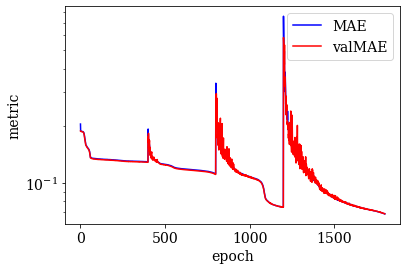

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


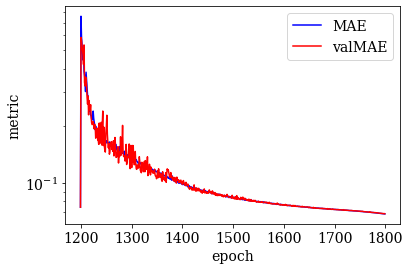

found 8745 stars.
60000/60000 - 1s


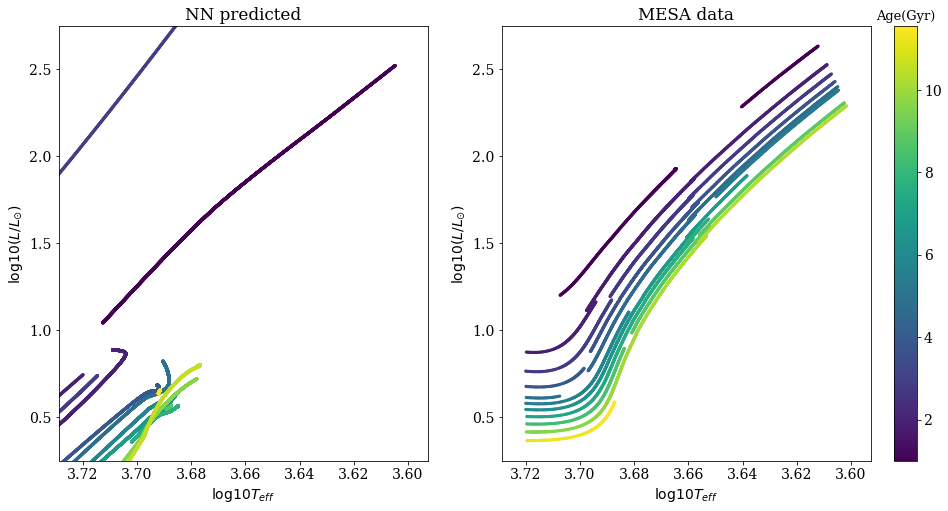

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.06856199
leg: 5/9
epochs of leg: 10000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 20000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 17:16:57.049483 | Time elapsed=1:31:11.973102


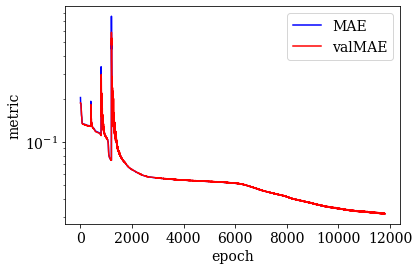

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


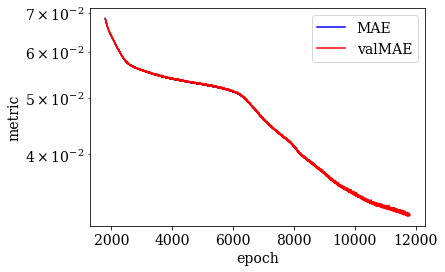

found 8745 stars.
60000/60000 - 1s


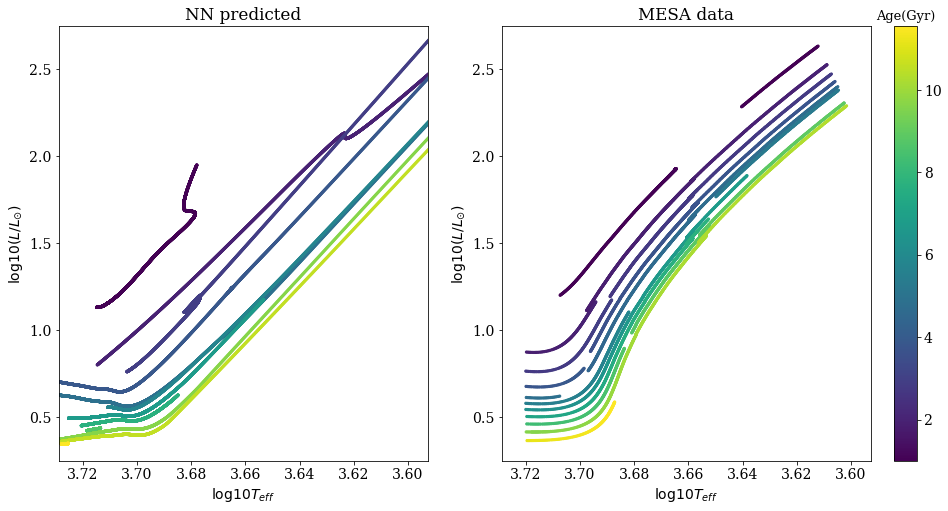

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.031452555
leg: 6/9
epochs of leg: 6000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 50000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 18:00:51.303762 | Time elapsed=0:43:24.964799


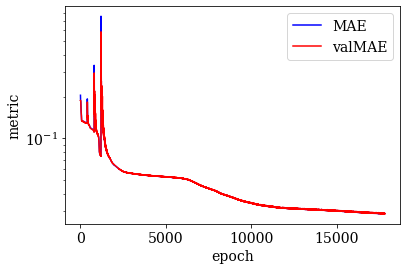

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


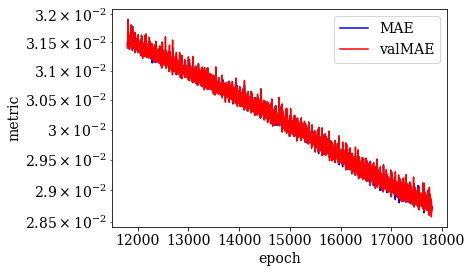

found 8745 stars.
60000/60000 - 1s


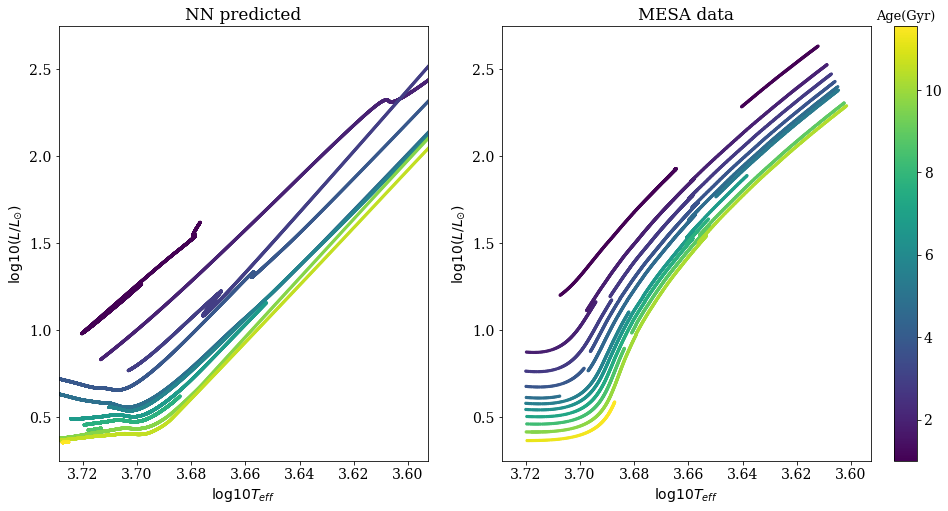

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.028737767
leg: 7/9
epochs of leg: 6000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 100000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 18:41:24.060752 | Time elapsed=0:40:01.517954


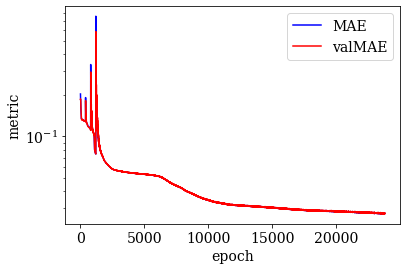

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


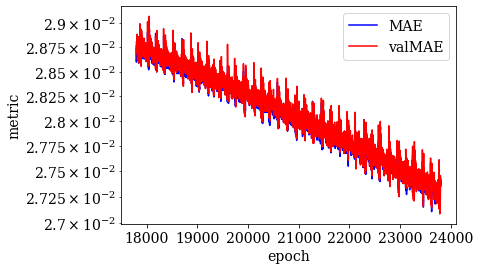

found 8745 stars.
60000/60000 - 1s


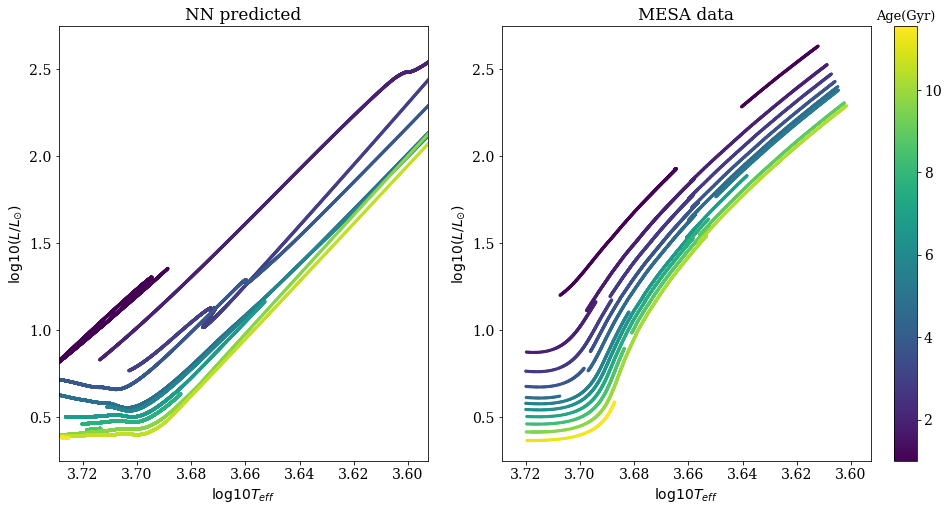

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.027357744
leg: 8/9
epochs of leg: 6000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 200000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 19:20:34.095094 | Time elapsed=0:38:36.679396


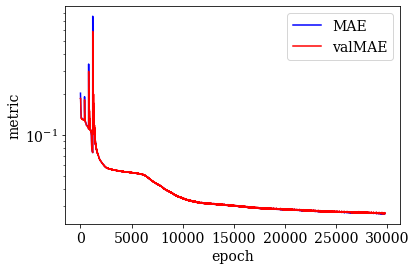

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


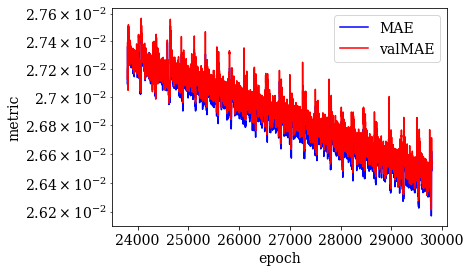

found 8745 stars.
60000/60000 - 1s


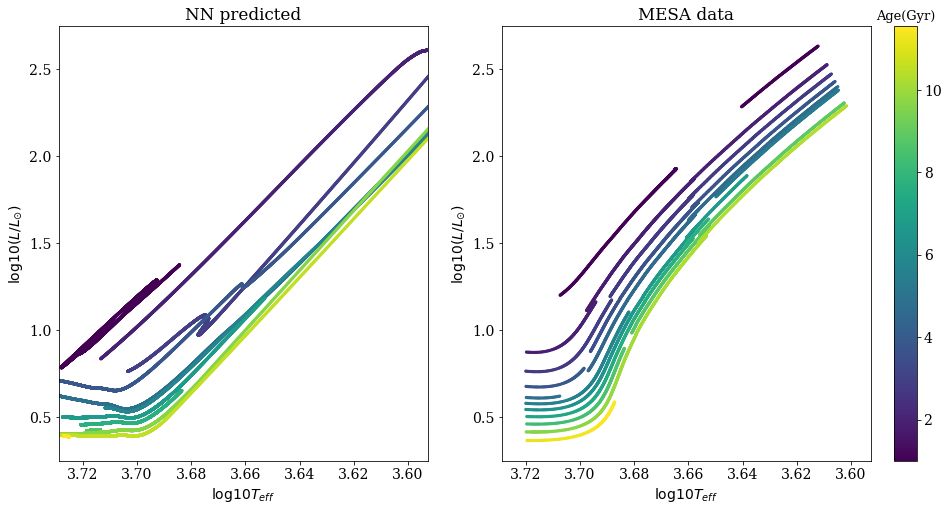

Isochrone saved as "drive/My Drive/4th Year Project/test/Isotest.png"
0.026483959
leg: 9/9
epochs of leg: 10000, optimizer: Nadam, activation: elu
learning rate: prev, batch size: 500000, regularization: ['l2', 1e-05], dropout: None, mean error type: MAE
training done! now=2020-02-29 20:09:04.327548 | Time elapsed=0:47:56.237300


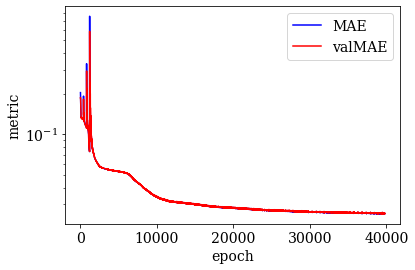

history plot saved as "drive/My Drive/4th Year Project/test/historytest.png"


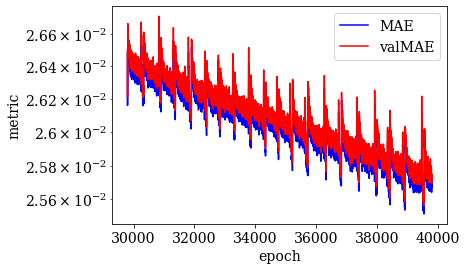

909444/909444 - 56s
909444/909444 - 75s - loss: 0.0342 - mean_absolute_error: 0.0255 - mean_squared_error: 0.0059
95069/95069 - 0s
found 8745 stars.
60000/60000 - 4s
60000/60000 - 4s
909444/909444 - 0s


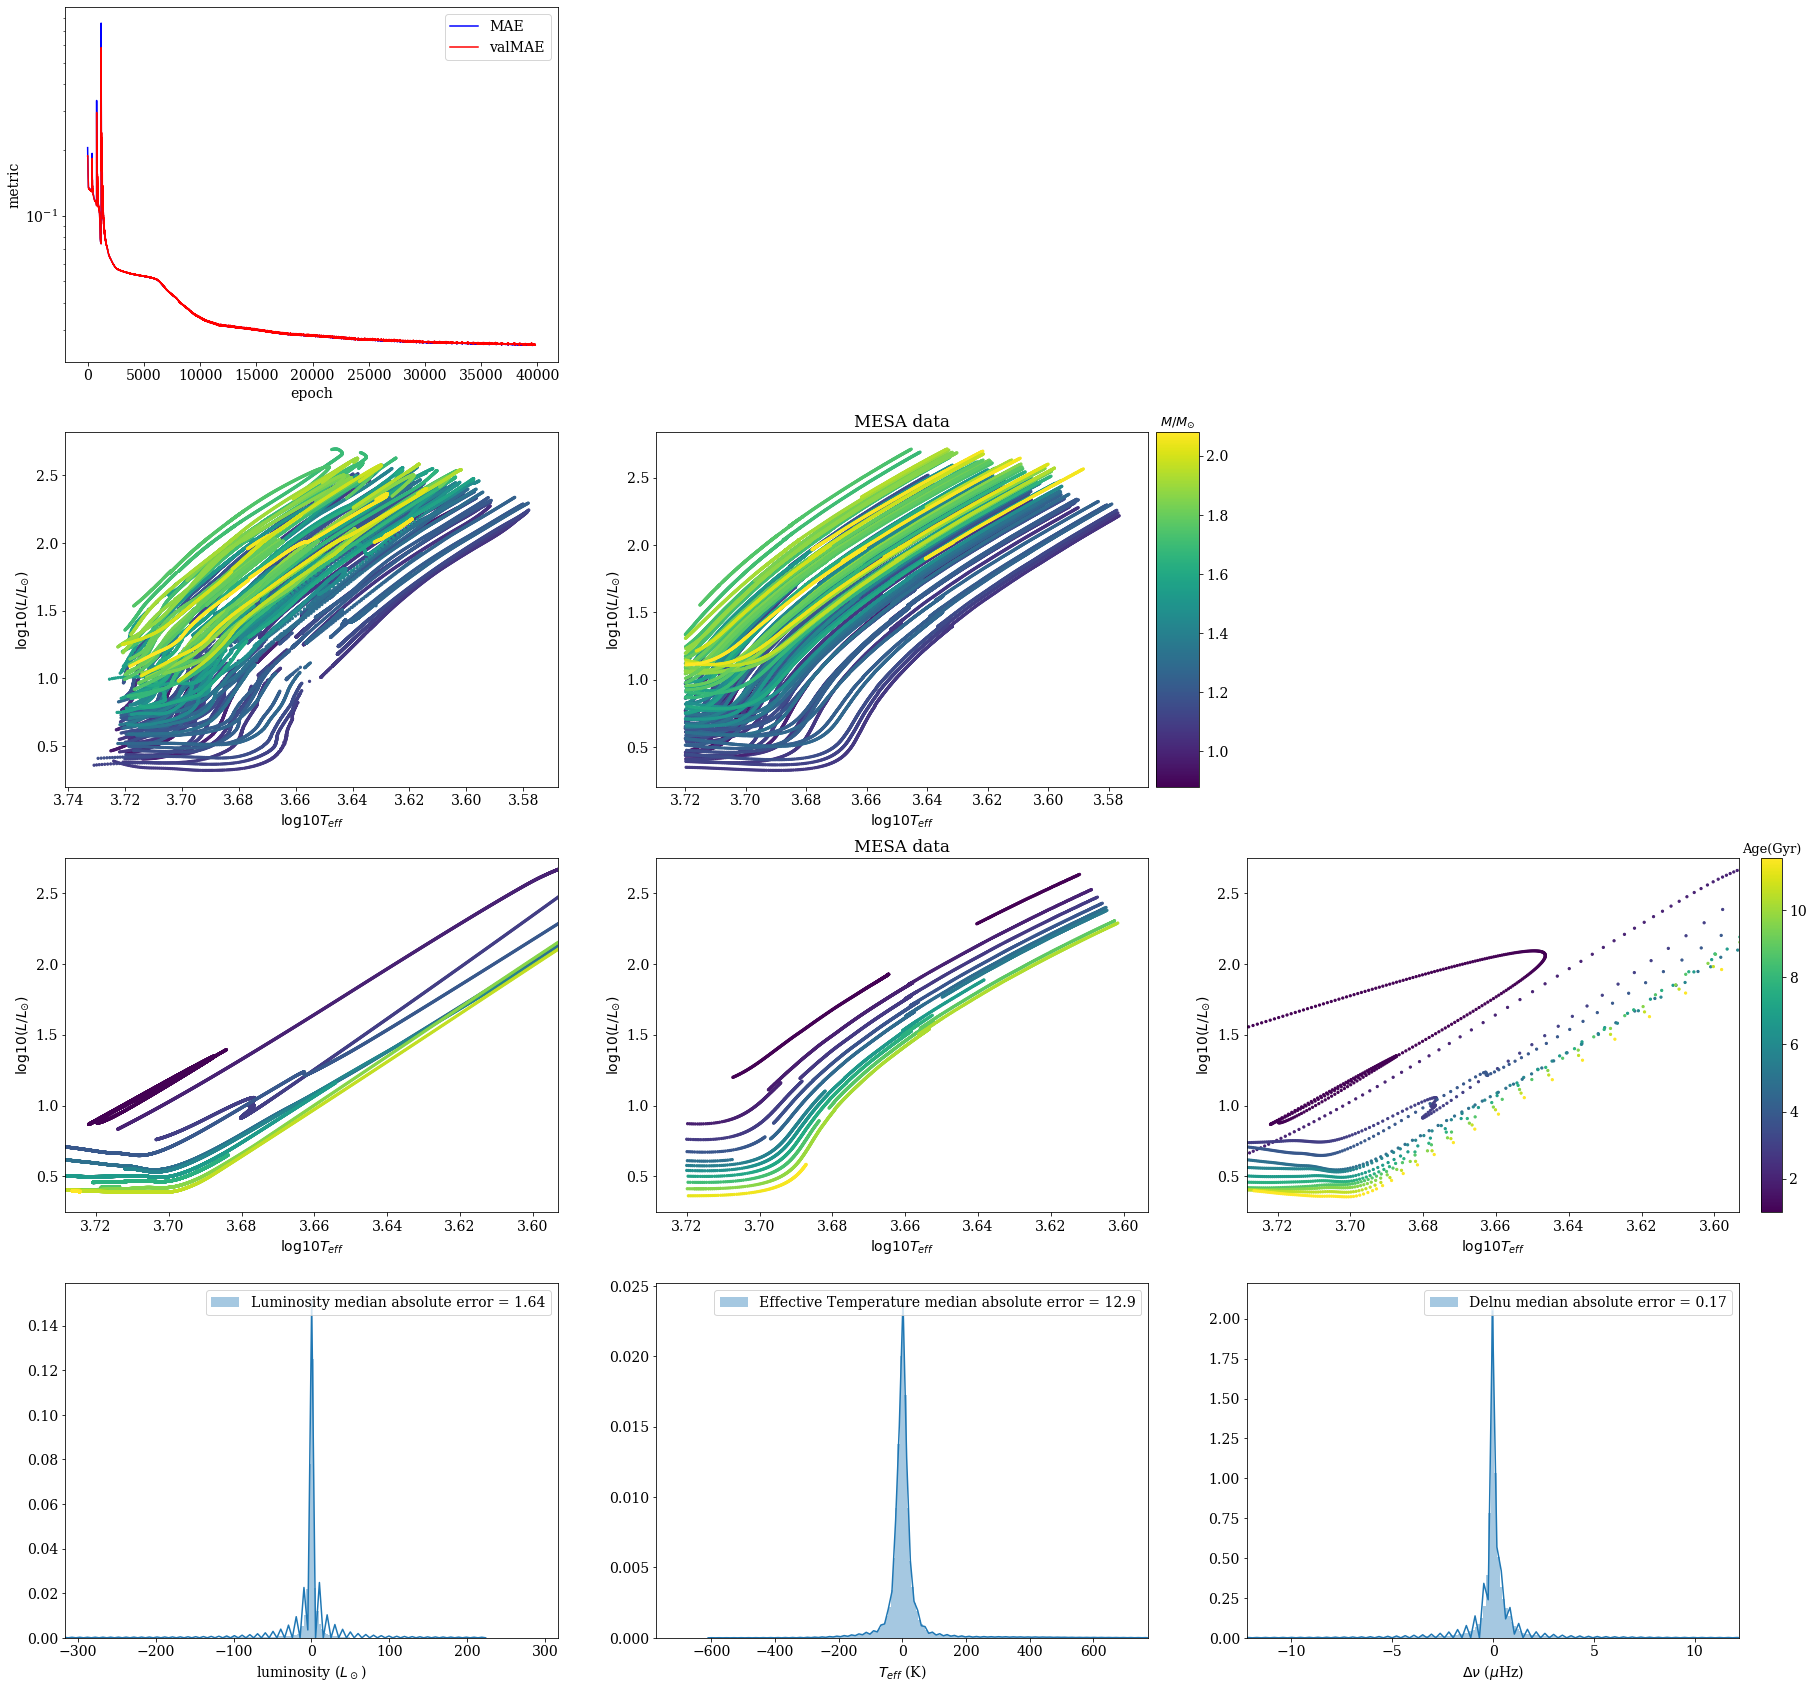

Multigraph saved as "drive/My Drive/4th Year Project/test/Combotest.png"
0.025673246 0.025528392 0.029680134536565636 0.011562123636412099 0.023466471662238572


In [0]:
starttime = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
legs = Leg_Setup(folder_name=folder_name,reg=reg,lr=lr,epoch_no=epoch_no,batch_size=batch_size,opt=opt,activation=activation,dropout=dropout,momentum=momentum,decay=decay,mean_error_type=mean_error_type,recompile=recompile)

if load_RGB_only == True:
  grid_file='drive/My Drive/4th Year Project/grid2_trun_RGB.csv'
else:
  grid_file='drive/My Drive/4th Year Project/grid2_trun.csv'
df = pd.read_csv(grid_file)
#######################################
#df['tenfeh'] = 10**df.star_feh # not required because already in grid
df['scale_T'] = (df.effective_T/5000) #adds additional column for experimenting
#print(df.keys())

if poly_degree != None and poly_degree != 0:
  poly_coeffs = [[10.080063081738215],[-6.299335472415236, 10.242237170209801],[-610.7218017418816, 89.85671949554772, 6.774087565549949],[16905.40447207155, -4065.6311495554132, 310.3175291041117, 2.44531045264507],[-345325.91585290496, 100978.60207855009,-11247.38751663596,559.9266166206404,-0.4452098122376857],[5477893.169557465,-1707033.133164369,221636.15660754204,-15654.177988126563,611.5582474359531,-0.31834338820664926],[-59126555.07934094,14508309.859740352,-1343909.580772016,81996.14585277902,-6402.515077045019,381.599457896548,1.3749938813434033],[-699962035.405495,430765243.7904518,-94918092.71809113,9901554.35675961,-484555.0863223898,5291.626663393838,418.7372807820708,-2.140655448794895],[82146144833.0785,-36765444489.27007,6910120364.377735,-704557665.2236683,41556469.95754824,-1336030.766888207,13441.264472906618,499.11916033295904,-3.694128400005397],[-370270824412.91266,186712010232.51346,-36545123603.61212,3601962498.6247864,-184265308.92825338,3520460.454963947,151277.9849266049,-16126.529234488851,712.3937516064432,-3.048353222993039]] #list of lists of best fit coefficients for different degree polynomials for use in radius scaling of the RGB, poly_coeffs[0] contains the best fit coefficients for a linear fit e.g. y=mx
  radius_coeffs = poly_coeffs[poly_degree-1]
  Teffs = np.array(df['effective_T'].values.tolist())
  Delnus = np.array(df['delta_nu'].values.tolist())
  truths = np.logical_and(Teffs<10**3.72, Delnus<100)
  df['scale_radius'] = df['radius']/10**(NNmodel.polynomial(3.72-np.log10(df['effective_T']),radius_coeffs)*truths)
else:
  radius_coeffs = None

df = df.sample(frac=1).reset_index(drop=True)
NNmodel.set_seed = set_seed

for leg in range(Get_Num_Legs_Trained(folder_name=folder_name,load_partially_trained_model=load_partially_trained_model),len(legs)):
    print("leg: {}/{}\nepochs of leg: {}, optimizer: {}, activation: {}\nlearning rate: {}, batch size: {}, regularization: {}, dropout: {}, mean error type: {}".format(leg+1,len(legs),legs[leg]['epoch_no'],legs[leg]['opt'],legs[leg]['activation'],legs[leg]['lr'],legs[leg]['batch_size'],legs[leg]['reg'],legs[leg]['dropout'],legs[leg]['mean_error_type'])) 
    start_epoch, m1 = NN_run(folder_name=folder_name, df=df, hidden_layers=hidden_layers, legs=legs, leg=leg)
    if leg == len(legs)-1:
      m1 = NN_results(last_leg = True, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, radius_coeffs=radius_coeffs)
    else:
      m1 = NN_results(last_leg = False, grid_file=grid_file,folder_name=folder_name, starttime=starttime,start_epoch=start_epoch, radius_coeffs=radius_coeffs)